In [2]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import numpy as np
import re
import os
import pandas as pd
from subprocess import check_output
from sklearn.datasets import load_files
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score, roc_curve,confusion_matrix
from sklearn.cross_validation import train_test_split
from random import choice
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [3]:
data= pd.read_csv(r'/media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/5000goldtexts_with_joined_feats.csv', sep="\t")
data.head()

,Unnamed: 0,Unnamed: 0.1,text,class,allclass,texts_pos,texts_fulltag,texts_lemmas,text_lemmas_nostop,texts_plus_pos,texts_+_pos
0,0,1729,🍒 🍒В наличии! В наличии! В наличии!🍒,реклама,spam,PR S PR S PR S,"PR= S,сред,неод=пр,ед PR= S,сред,неод=пр,ед PR...",🍒 🍒 в наличие ! в наличие ! в нали...,🍒 🍒 наличие наличие наличие 🍒,"🍒 🍒 В PR= наличии S,сред,неод=пр,ед ! В...",ВPR наличииS ВPR наличииS ВPR наличииS
1,1,4988,"Многие врут, чтобы показаться лучше, чем они ...",цитаты,notspam,SPRO V CONJ V ADV CONJ SPRO V PR APRO S V CONJ...,"SPRO,мн=им V,несов,пе=непрош,мн,изъяв,3-л CONJ...","многие врать , чтобы показываться хор...",многие врать показываться самый дело забывать ...,"Многие SPRO,мн=им врут V,несов,пе=непрош,м...",МногиеSPRO врутV чтобыCONJ показатьсяV лучшеAD...
2,2,1954,Lera Lera - До свидания (Клип):,мусор,spam,PR S S,"PR= S,сред,неод=(вин,мн|род,ед|им,мн) S,муж,не...",Lera Lera - до свидание ( клип ):\n,Lera Lera свидание клип ):,"Lera Lera - До PR= свидания S,сред,нео...",ДоPR свиданияS КлипS
3,3,2765,привет старатели !))) всем удачи !,хорошие,notspam,S S SPRO S,"S,муж,неод=(вин,ед|им,ед) S,муж,од=им,мн SPRO,...",привет старатель ! ))) все удача ! \n,привет старатель ))) удача,"привет S,муж,неод=(вин,ед|им,ед) старатели...",приветS старателиS всемSPRO удачиS
4,4,3331,Люблю рисовать))) И котиков))))💗💗💗,хорошие,notspam,V V CONJ S,"V,несов,пе=непрош,ед,изъяв,1-л V,несов,пе=инф ...",любить рисовать ))) и котиков )))) 💗 💗 ...,любить рисовать ))) котиков )))) 💗 💗 💗,"Люблю V,несов,пе=непрош,ед,изъяв,1-л рисов...",ЛюблюV рисоватьV ИCONJ котиковS


In [4]:
sp = []
for i in range(len(data)):
    if data.allclass.iloc[i]=="spam":
        sp.append(1)
    else:
        sp.append(0)
data["vwclass"] = sp
data.head()

,Unnamed: 0,Unnamed: 0.1,text,class,allclass,texts_pos,texts_fulltag,texts_lemmas,text_lemmas_nostop,texts_plus_pos,texts_+_pos,vwclass
0,0,1729,🍒 🍒В наличии! В наличии! В наличии!🍒,реклама,spam,PR S PR S PR S,"PR= S,сред,неод=пр,ед PR= S,сред,неод=пр,ед PR...",🍒 🍒 в наличие ! в наличие ! в нали...,🍒 🍒 наличие наличие наличие 🍒,"🍒 🍒 В PR= наличии S,сред,неод=пр,ед ! В...",ВPR наличииS ВPR наличииS ВPR наличииS,1
1,1,4988,"Многие врут, чтобы показаться лучше, чем они ...",цитаты,notspam,SPRO V CONJ V ADV CONJ SPRO V PR APRO S V CONJ...,"SPRO,мн=им V,несов,пе=непрош,мн,изъяв,3-л CONJ...","многие врать , чтобы показываться хор...",многие врать показываться самый дело забывать ...,"Многие SPRO,мн=им врут V,несов,пе=непрош,м...",МногиеSPRO врутV чтобыCONJ показатьсяV лучшеAD...,0
2,2,1954,Lera Lera - До свидания (Клип):,мусор,spam,PR S S,"PR= S,сред,неод=(вин,мн|род,ед|им,мн) S,муж,не...",Lera Lera - до свидание ( клип ):\n,Lera Lera свидание клип ):,"Lera Lera - До PR= свидания S,сред,нео...",ДоPR свиданияS КлипS,1
3,3,2765,привет старатели !))) всем удачи !,хорошие,notspam,S S SPRO S,"S,муж,неод=(вин,ед|им,ед) S,муж,од=им,мн SPRO,...",привет старатель ! ))) все удача ! \n,привет старатель ))) удача,"привет S,муж,неод=(вин,ед|им,ед) старатели...",приветS старателиS всемSPRO удачиS,0
4,4,3331,Люблю рисовать))) И котиков))))💗💗💗,хорошие,notspam,V V CONJ S,"V,несов,пе=непрош,ед,изъяв,1-л V,несов,пе=инф ...",любить рисовать ))) и котиков )))) 💗 💗 ...,любить рисовать ))) котиков )))) 💗 💗 💗,"Люблю V,несов,пе=непрош,ед,изъяв,1-л рисов...",ЛюблюV рисоватьV ИCONJ котиковS,0


In [6]:
y = data["vwclass"]
X = data["text"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
def vowpalize(document, label=None):
    return str(str(label) or '') + ' |text ' + ' '.join(re.findall('\w{3,}', str(document).lower())) + '\n'

In [8]:
vowpalize(X_train[1], 1 if y_train[0] == 1 else -1)

'1 |text многие врут чтобы показаться лучше чем они есть самом деле забыв что лучшее что есть человеке честность\n'

In [15]:
with open('/media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_train.vw', 'w') as vw_train_data:
     for x, y in zip(X_train, y_train):
        vw_train_data.write(vowpalize(x, 1 if y == 1 else -1))
with open('/media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_test.vw', 'w') as vw_test_data:
    for x, y in zip(X_test, y_test):
        vw_test_data.write(vowpalize(x, 1 if y == 1 else -1))

In [95]:
!vw -d /media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_train.vw --loss_function squared -f /media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_model.vw

final_regressor = /media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = /media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
1.000000 1.000000            1            1.0  -1.0000   0.0000       23
0.961258 0.922515            2            2.0  -1.0000  -0.0395        7
0.690427 0.419596            4            4.0  -1.0000  -0.6899      450
0.845526 1.000624            8            8.0  -1.0000  -0.0885       10
0.817052 0.788578           16           16.0  -1.0000  -0.5579       94
0.831725 0.846398           32           32.0  -1.0000  -0.0788       11
0.784219 0.736713           64           64.0  -1.0000  -0.1259       11
0.771585 0.758950          128          128.0 

In [96]:
!vw -i /media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_model.vw -t -d /media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_test.vw -p /media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_test_predictions.txt

only testing
predictions = /media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_test_predictions.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = /media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_test.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.152084 0.152084            1            1.0   1.0000   0.6100       23
0.423174 0.694264            2            2.0   1.0000   0.1668        6
0.211730 0.000286            4            4.0  -1.0000  -1.0000       39
0.470593 0.729455            8            8.0   1.0000   0.0792        6
0.402953 0.335314           16           16.0   1.0000   1.0000       39
0.559280 0.715606           32           32.0  -1.0000  -0.8075       45
0.517726 0.476173           64           64.0  -1.0000  -0.4795       10
0.506251 0.494776         

In [97]:
t = open(r"/media/mi_air/0F0B7DDE62EEA81E/Documents/vk_crawler/vowpal_wabbit/spam_test_predictions.txt", "r").readlines()
    
test_predicted_labels = []
    
for i in t:
    test_predicted_labels.append(float(i.strip("\n")))

In [98]:

test_predicted_labels_bin=[0 for i in range(len(test_predicted_labels))]

In [117]:
for i in range(len(test_predicted_labels)):
    if test_predicted_labels[i]>=-0.09:
        test_predicted_labels_bin[i]=1
    else:
        test_predicted_labels_bin[i]=0

In [100]:
"""for i in range(len(test_predicted_labels)):
    if test_predicted_labels[i]>=0:
        test_predicted_labels_bin[i]=1
    else:
        test_predicted_labels_bin[i]=0"""

In [118]:
accuracy =  accuracy_score(y_test, test_predicted_labels_bin)
#print(y_test)
#print(test_predicted_labels_bin)
print(accuracy)

0.86


In [122]:
from sklearn.metrics import *
import seaborn as sns

SVM on words, new classes
Precision:   0.87
Recall:   0.84
F1-measure:   0.85
Accuracy:   0.86
             precision    recall  f1-score   support

          0       0.84      0.94      0.89       301
          1       0.90      0.73      0.81       199

avg / total       0.86      0.86      0.86       500



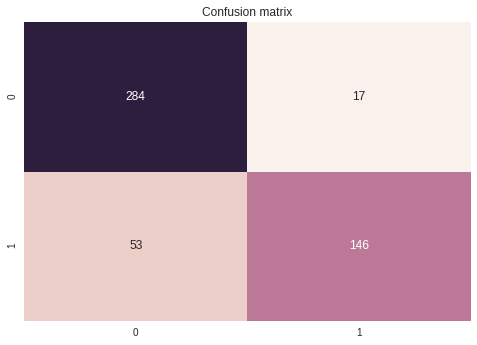

In [123]:
predictions = test_predicted_labels_bin
print("SVM on words, new classes")
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))
labels = (0, 1)
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [102]:
for i in range(len(y_test)):
    print(y_test.iloc[i],test_predicted_labels[i])

1 0.610021
1 0.166775
0 -0.976091
0 -1.0
1 -0.236497
0 -0.297444
0 -0.782126
1 0.079217
0 -0.80391
1 0.212395
0 0.126845
0 -0.278258
0 -1.0
0 -0.517247
0 -1.0
1 1.0
0 0.184773
0 -1.0
1 -0.79674
0 -1.0
0 -0.549069
0 -0.976308
0 -0.101701
1 -1.0
1 1.0
1 -0.149796
0 -0.9368
0 -0.333819
1 1.0
0 -1.0
0 -1.0
0 -0.807471
0 -1.0
1 1.0
0 -1.0
0 -0.609953
0 -0.478337
1 0.498657
1 -0.61847
0 -0.608629
0 -1.0
0 -1.0
0 -1.0
1 -0.098877
0 -0.884352
0 -0.408079
1 0.866576
1 1.0
0 -0.332993
1 -0.412976
1 0.043419
0 -1.0
0 -0.439023
1 0.959173
0 -0.405506
1 1.0
1 1.0
0 -0.344717
1 1.0
0 1.0
1 -0.089808
0 -0.46523
0 -1.0
0 -0.479488
0 -0.935592
1 -0.255122
0 -0.702247
1 1.0
0 -0.357942
1 -0.382082
0 -1.0
0 -1.0
0 -0.233314
0 -0.267579
0 -0.210808
1 0.571887
1 -0.468393
0 -1.0
1 -0.259381
0 -0.253829
0 -1.0
1 0.376102
0 -0.486389
1 0.581088
1 1.0
1 0.616952
0 -1.0
1 0.881636
1 0.553231
0 -1.0
0 -0.768379
0 -1.0
0 -1.0
0 -1.0
1 0.516091
1 1.0
1 1.0
1 0.100734
0 0.35295
0 -1.0
0 -0.188893
0 0.165022
1 -0.1

In [ ]:
#такие же качество дала loss - hinge, с границей -0.4